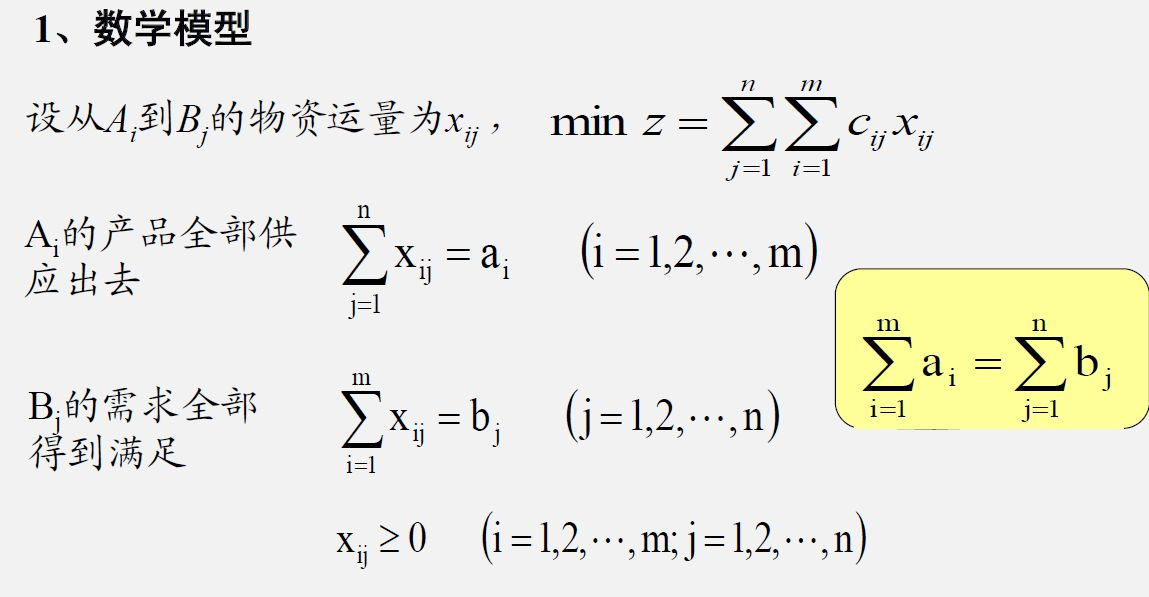

In [1]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ
import pandas as pd


def demand_cal(X):
    df = pd.DataFrame([X[0],X[1]*0.6,X[1]*0.4,X[2]*0.45,X[2]*0.55,X[3]*0.7,X[3]*0.3])
    df.index = ['Sig','Ind_E','Ind_W','Mal_N','Mal_S','Tai_E','Tai_W']
    return df

#?
def supply_cal(X):
    name = ['Sig','Ind','Mal','Tai']
    d = dict()
    for i in range(4):
        d[name[i]] = supply_lst[i]*1000
    return d

def c_init(model, i, j):
    return model.f * model.d[i,j] - model.f * model.p[i,j]

# 供给约束
def supply_rule(model, i):
    return sum(model.x[i,j] for j in model.j) <= model.a[i]

# 需求约束
def demand_rule(model, j):
    return sum(model.x[i,j] for i in model.i) <= model.b[j]  

def objective_rule(model):
    return sum(model.c[i,j]*model.x[i,j] for i in model.i for j in model.j)

def pyomo_postprocess(options=None, instance=None, results=None):
    model.x.display()

In [2]:
def Optimizer1(supply_lst, demand_lst):
    log_mat = pd.DataFrame({'Sig':[25,40,35,41,35,55,52],
                        'Ind':[55,28,30,45,43,60,65],
                        'Mal':[32,40,42,27,30,48,53],
                        'Tai':[55,63,58,42,45,32,30]}).T
    log_mat.columns = ['Sig','Ind_E','Ind_W','Mal_N','Mal_S','Tai_E','Tai_W']
    demand_mat = demand_cal(demand_lst)*200 # 20%*1000 需求
    supply_mat = supply_cal(supply_lst)   

    model = ConcreteModel()
    model.i = Set(initialize=['Sig','Ind','Mal','Tai'], doc='Canning plans')
    model.j = Set(initialize=['Sig','Ind_E','Ind_W','Mal_N','Mal_S','Tai_E','Tai_W'], doc='Markets')
    model.a = Param(model.i, initialize=supply_mat, doc='Capacity of plant i in cases')
    model.b = Param(model.j, initialize=demand_mat, doc='Demand at market j in cases')
    p = dict()
    for i in range(4):
        for j in range(7):
            p[(log_mat.index[i],log_mat.columns[j])]=980
    d = dict()
    for i in range(4):
        for j in range(7):
            d[(log_mat.index[i], log_mat.columns[j])] = log_mat.iloc[i, j]

    model.d = Param(model.i, model.j, initialize=d, doc='Distance in thousands of miles')
    model.p = Param(model.i, model.j, initialize=p, doc='Distance in thousands of miles')
    model.f = Param(initialize=1, doc='Freight in dollars per case per thousand miles')
    model.c = Param(model.i, model.j, initialize=c_init, doc='Transport cost in thousands of dollar per case')
    model.x = Var(model.i, model.j, bounds=(0.0,None), doc='Shipment quantities in case')
    
    model.supply = Constraint(model.i, rule=supply_rule, doc='Observe supply limit at plant i')
    model.demand = Constraint(model.j, rule=demand_rule, doc='Satisfy demand at market j')
    model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')


    opt = SolverFactory("glpk")
    results = opt.solve(model)
    #results.write()
    model.a.pprint()
    model.b.pprint()
    model.x.pprint()

In [4]:
demand_lst = [6.3,3.1,3.3,3.6]
supply_lst = [0,0,0,3]
Optimizer1(supply_lst, demand_lst)

a : Capacity of plant i in cases
    Size=4, Index=i, Domain=Any, Default=None, Mutable=False
    Key : Value
    Ind :     0
    Mal :     0
    Sig :     0
    Tai :  3000
b : Demand at market j in cases
    Size=7, Index=j, Domain=Any, Default=None, Mutable=False
    Key   : Value
    Ind_E :              372.0
    Ind_W : 248.00000000000006
    Mal_N :              297.0
    Mal_S :              363.0
      Sig :             1260.0
    Tai_E :              504.0
    Tai_W :              216.0
x : Shipment quantities in case
    Size=28, Index=x_index
    Key              : Lower : Value  : Upper : Fixed : Stale : Domain
    ('Ind', 'Ind_E') :   0.0 :    0.0 :  None : False : False :  Reals
    ('Ind', 'Ind_W') :   0.0 :    0.0 :  None : False : False :  Reals
    ('Ind', 'Mal_N') :   0.0 :    0.0 :  None : False : False :  Reals
    ('Ind', 'Mal_S') :   0.0 :    0.0 :  None : False : False :  Reals
      ('Ind', 'Sig') :   0.0 :    0.0 :  None : False : False :  Reals
    ('Ind', '

In [3]:
help("pyomo")

Help on package pyomo:

NAME
    pyomo

DESCRIPTION
    #  ___________________________________________________________________________
    #
    #  Pyomo: Python Optimization Modeling Objects
    #  Copyright 2017 National Technology and Engineering Solutions of Sandia, LLC
    #  Under the terms of Contract DE-NA0003525 with National Technology and 
    #  Engineering Solutions of Sandia, LLC, the U.S. Government retains certain 
    #  rights in this software.
    #  This software is distributed under the 3-clause BSD License.
    #  ___________________________________________________________________________

PACKAGE CONTENTS
    checker (package)
    common (package)
    contrib (package)
    core (package)
    dae (package)
    dataportal (package)
    duality (package)
    environ (package)
    gdp (package)
    kernel (package)
    mpec (package)
    neos (package)
    network (package)
    opt (package)
    pysp (package)
    repn (package)
    scripting (package)
    solvers (p